"[Список стран по ожидаемой продолжительности жизни](https://ru.wikipedia.org/wiki/Список_стран_по_ожидаемой_продолжительности_жизни)"<br />
"[Продолжительность жизни в субъектах Российской Федерации](https://ru.wikipedia.org/wiki/Продолжительность_жизни_в_субъектах_Российской_Федерации)"<br />
[World Development Indicators > Life expectancy at birth](https://databank.worldbank.org/reports.aspx?source=2&series=SP.DYN.LE00.IN&country=) *(databank.worldbank.org)*<br />
[Таблица подбора цветов](http://mal-bioit.ru/survey-web-colors)<br />
[Список государств и зависимых территорий по населению](https://ru.wikipedia.org/wiki/Список_государств_и_зависимых_территорий_по_населению)

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from collections import namedtuple

In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

DESTINATION_OUTPUT = 'pass'  # 'show' / 'file' / 'pass'
LANG = 'en'

In [3]:
dd_to_rus = {'USA': 'США',
             'China': 'Китай',
             'Russia': 'Россия',
             'Ukraine': 'Украина',
             'Kazakhstan': 'Казахстан',
             'Belarus': 'Белоруссия',
             'Uzbekistan': 'Узбекистан',
             'Tajikistan': 'Таджикистан',
             'Kyrgyzstan': 'Киргизия',
             'Turkmenistan': 'Туркменистан',
             'Georgia': 'Грузия',
             'Azerbaijan': 'Азербайджан',
             'Armenia': 'Армения',
             'Moldova': 'Молдавия',
             'Germany': 'Германия',
             'UK': 'Великобритания',
             'France': 'Франция',
             'Italy': 'Италия',
             'Spain': 'Испания',
             'Poland': 'Польша',
             'Romania': 'Румыния',
             'Netherlands': 'Нидерланды',
             'Belgium': 'Бельгия',
             'Czechia': 'Чехия',
             'Greece': 'Греция',
             'Portugal': 'Португалия',
             'Sweden': 'Швеция',
             'Hungary': 'Венгрия',
             'Austria': 'Австрия',
             'Serbia': 'Сербия',
             'Switzerland': 'Швейцария',
             'Bulgaria': 'Болгария',
             'Denmark': 'Дания',
             'Finland': 'Финляндия',
             'Slovakia': 'Словакия',
             'Norway': 'Норвегия',
             'Ireland': 'Ирландия',
             'Croatia': 'Хорватия',
             'India': 'Индия',
             'Indonesia': 'Индонезия',
             'Israel': 'Израиль',
             'Japan': 'Япония',
             'South Korea': 'Южная Корея',
             'North Korea': 'Северная Корея',
             'Pakistan': 'Пакистан',
             'Bangladesh': 'Бангладеш',
             'Malaysia': 'Малайзия',
             'Philippines': 'Филиппины',
             'Iran': 'Иран',
             'Turkey': 'Турция',
             'Iraq': 'Ирак',
             'Saudi Arabia': 'Саудовская Аравия',
             'Syria': 'Сирия',
             'Jordan': 'Иордания',
             'United Arab Emirates': 'ОАЭ',
             'Lebanon': 'Ливан',
             'Australia': 'Австралия',
             'New Zealand': 'Новая Зеландия',
             'Canada': 'Канада',
             'Mexico': 'Мексика',
             'Cuba': 'Куба',
             'Brazil': 'Бразилия',
             'Colombia': 'Колумбия',
             'Argentina': 'Аргентина',
             'Peru': 'Перу',
             'Chile': 'Чили',
             'Venezuela': 'Венесуэла',
             'Ecuador': 'Эквадор',
             'Nigeria': 'Нигерия',
             'Ethiopia': 'Эфиопия',
             'Egypt': 'Египет',
             'DR Congo': 'ДР Конго',
             'South Africa': 'ЮАР',    
             'Algeria': 'Алжир',
             'Tanzania': 'Танзания',
             'Kenya': 'Кения',
             'Estonia': 'Эстония',
             'Latvia': 'Латвия',
             'Lithuania': 'Литва',
             'Singapore': 'Сингапур',
             'Thailand': 'Тайланд',
             'Costa Rica': 'Коста Рика',
             'Kuwait': 'Кувейт',
             'Panama': 'Панама',
             'Uruguay': 'Уругвай',
             'High income': 'высокий доход',
             'Upper middle income': 'верхне-средний доход',
             'Middle income': 'средний доход',
             'Lower middle income': 'нижне-средний доход',
             'Low income': 'низкий доход'
            }

In [4]:
def pretify_df(df):
    ls_choose = ['United States', 'China', 'Russian Federation',
                 'Ukraine', 'Kazakhstan', 'Belarus', 'Uzbekistan', 'Azerbaijan', 'Tajikistan', 'Kyrgyz Republic', 'Turkmenistan',
                 'Armenia', 'Moldova', 'Georgia',
                 'Latvia', 'Lithuania', 'Estonia',
                 'Germany', 'United Kingdom', 'France', 'Italy', 'Spain', 'Poland', 'Romania', 'Netherlands',
                 'Belgium', 'Czechia', 'Greece', 'Portugal', 'Sweden', 'Hungary',
                 'Austria', 'Serbia', 'Switzerland', 'Bulgaria', 'Denmark', 'Finland', 'Slovak Republic', 'Norway', 'Ireland', 'Croatia',
                 'India', 'Indonesia', 'Israel', 'Japan', 'Korea, Rep.', 'Pakistan', 'Bangladesh', 'Malaysia', 'Philippines',
                 'Iran, Islamic Rep.', 'Turkiye', 'Iraq', 'Saudi Arabia', 'Yemen, Rep.', 'Syrian Arab Republic', 'Jordan', 'United Arab Emirates',
                 'Lebanon', 'Oman', 'Kuwait',
                 'Australia', 'New Zealand', 'Canada', 'Mexico', 'Cuba',
                 'Brazil', 'Colombia', 'Argentina', 'Peru', 'Chile', 'Ecuador', 'Venezuela, RB', 'Uruguay',
                 'Nigeria', 'Ethiopia', 'Egypt, Arab Rep.', 'Congo, Dem. Rep.', 'South Africa', 'Algeria', 'Tanzania', 'Kenya',
                 'Low income', 'Lower middle income', 'Middle income', 'Upper middle income', 'High income',
                 'Thailand', 'Singapore', 'Costa Rica', 'Panama',
                 "Korea, Dem. People's Rep."
                ]

    return df.loc[ls_choose] \
             .rename(index = {'United States':'USA',
                              'Russian Federation': 'Russia',
                              'Korea, Rep.': 'South Korea',
                              "Korea, Dem. People's Rep.": 'North Korea',
                              'Egypt, Arab Rep.': 'Egypt',
                              'Congo, Dem. Rep.': 'DR Congo',
                              'Congo, Rep.': 'Rep. Congo',
                              'Yemen, Rep.': 'Yemen',
                              'Micronesia, Fed. Sts.': 'Micronesia',
                              'Gambia, The': 'Gambia',
                              'Iran, Islamic Rep.': 'Iran',
                              'Syrian Arab Republic': 'Syria',
                              'Venezuela, RB': 'Venezuela',
                              'Kyrgyz Republic': 'Kyrgyzstan',
                              'Lao PDR': 'Laos',
                              'Czech Republic': 'Czechia',
                              'Slovak Republic': 'Slovakia',
                              'Bahamas, The': 'Bahamas',
                              'Brunei Darussalam': 'Brunei',
                              'Turkiye': 'Turkey',
                              'United Kingdom': 'UK'
                             }) \
             .iloc[:, 3:-2] \
             .rename(columns=int)  # transform names of columns from strings to integers, like '1960' -> 1960

In [5]:
pd.options.display.min_rows = 4

In [6]:
df = pd.read_csv('data/World_Bank_Group-total.csv', skiprows=4, index_col=0)
df = pretify_df(df)
df.dropna(how='all', inplace=True)
df.index.name = ''
print(f"df_total: {len(df)} records")

pd.concat([df.head(3), df.tail(2)]).fillna('')  # look at the beginning and end of the intermediate value

df_total: 92 records


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
USA,69.770732,70.270732,70.119512,69.917073,70.165854,70.214634,70.212195,70.560976,69.951220,70.507317,70.807317,71.107317,71.156098,71.356098,71.956098,72.604878,72.856098,73.256098,73.356098,73.804878,73.609756,74.009756,74.360976,74.463415,74.563415,74.563415,74.614634,74.765854,74.765854,75.017073,75.214634,75.365854,75.617073,75.419512,75.619512,75.621951,76.026829,76.429268,76.580488,76.582927,76.636585,76.836585,76.936585,77.036585,77.487805,77.487805,77.687805,77.987805,78.039024,78.390244,78.541463,78.641463,78.741463,78.741463,78.841463,78.690244,78.539024,78.539024,78.639024,78.787805,76.980488,76.329268
China,33.275000,40.468000,50.818000,51.408000,52.156000,52.912000,53.637000,54.351000,55.057000,55.738000,56.607000,57.565000,58.418000,59.389000,60.168000,60.917000,61.796000,62.538000,63.218000,63.865000,64.420000,64.975000,65.463000,65.904000,66.300000,66.643000,66.970000,67.288000,67.581000,67.838000,68.005000,68.169000,68.734000,69.216000,69.520000,70.008000,70.266000,70.672000,71.172000,71.419000,71.881000,72.606000,72.985000,73.371000,73.748000,74.111000,74.504000,74.762000,74.872000,75.343000,75.599000,75.903000,76.192000,76.452000,76.717000,76.977000,77.218000,77.248000,77.744000,77.968000,78.077000,78.211000
Russia,67.465220,67.630951,67.300512,67.757171,68.367171,67.887756,67.901195,67.593805,67.489366,66.876293,68.133659,68.376585,68.308537,68.294634,68.320244,67.723902,67.487561,67.376341,67.390976,67.114390,67.033902,67.263902,67.806098,67.652683,67.202683,67.856829,69.389756,69.440000,69.464390,69.171707,68.886098,68.474390,66.873171,64.935854,64.467073,64.690732,65.854146,66.698780,67.029756,65.982195,65.483659,65.383415,65.128780,65.027561,65.470976,65.529756,66.727561,67.586829,67.949268,68.684634,68.841220,69.683902,70.072195,70.578780,70.743659,71.183415,71.651220,72.451463,72.662195,73.083902,71.338780,69.361220
Panama,60.702000,61.471000,62.154000,62.735000,63.203000,63.558000,63.789000,64.056000,64.313000,64.662000,65.083000,65.787000,66.457000,67.087000,67.653000,68.079000,68.381000,68.603000,68.761000,68.989000,69.254000,69.586000,69.939000,70.270000,70.543000,70.732000,70.833000,70.888000,70.888000,69.936000,71.097000,71.207000,71.462000,71.800000,72.096000,72.385000,72.675000,72.970000,73.279000,73.622000,74.001000,74.414000,74.824000,75.218000,75.544000,75.829000,76.012000,76.154000,76.225000,76.343000,76.448000,76.627000,76.819000,77.038000,77.248000,77.468000,77.653000,77.795000,77.863000,77.810000,76.657000,76.223000
North Korea,54.050000,54.496000,54.999000,55.560000,56.157000,56.827000,57.598000,58.409000,59.175000,59.926000,60.571000,61.176000,61.807000,62.386000,62.962000,63.526000,64.143000,64.655000,65.187000,65.672000,66.158000,66.658000,67.167000,67.677000,68.190000,68.681000,69.147000,69.442000,69.803000,70.039000,70.210000,70.313000,70.824000,71.871000,70.718000,60.894000,60.956000,60.974000,60.906000,60.798000,60.763000,60.745000,60.792000,69.546000,69.437000,69.285000,69.085000,68.911000,68.958000,69.732000,70.419000,70.978000,71.626000,72.319000,72.942000,72.784000,72.805000,72.978000,73.031000,73.198000,73.274000,73.284000


In [7]:
# Difference in LE between countries with high and low income
# (df.loc['High income'] - df.loc['Low income'])[[1960, 1970, 1980, 1990, 2000, 2010, 2019, 2020]].round(2)

In [8]:
# transpose dataFrame
df = df.transpose()

pd.concat([df.head(2), df.tail(3)]).fillna('')  # look at the beginning and end of the intermediate value

,USA,China,Russia,Ukraine,Kazakhstan,Belarus,Uzbekistan,Azerbaijan,Tajikistan,Kyrgyzstan,Turkmenistan,Armenia,Moldova,Georgia,Latvia,Lithuania,Estonia,Germany,UK,France,Italy,Spain,Poland,Romania,Netherlands,Belgium,Czechia,Greece,Portugal,Sweden,Hungary,Austria,Serbia,Switzerland,Bulgaria,Denmark,Finland,Slovakia,Norway,Ireland,Croatia,India,Indonesia,Israel,Japan,South Korea,Pakistan,Bangladesh,Malaysia,Philippines,Iran,Turkey,Iraq,Saudi Arabia,Yemen,Syria,Jordan,United Arab Emirates,Lebanon,Oman,Kuwait,Australia,New Zealand,Canada,Mexico,Cuba,Brazil,Colombia,Argentina,Peru,Chile,Ecuador,Venezuela,Uruguay,Nigeria,Ethiopia,Egypt,DR Congo,South Africa,Algeria,Tanzania,Kenya,Low income,Lower middle income,Middle income,Upper middle income,High income,Thailand,Singapore,Costa Rica,Panama,North Korea
1960,69.770732,33.275,67.465220,69.485049,58.370512,69.254610,57.473,55.837,53.628,55.083024,53.469,61.431,61.074,61.222,69.786829,69.847317,68.933512,69.064073,71.126829,69.868293,69.123902,69.109268,67.680488,65.860537,73.392683,69.701951,70.348780,69.300000,64.007463,73.005610,68.003171,68.585610,63.934000,71.313415,69.247561,72.176585,68.819756,70.269780,73.549756,70.194268,65.482366,45.218,46.452,,67.695610,54.320244,44.932,44.740,56.502,59.227,43.957,50.740,52.618,45.940,33.678,53.547,52.617,48.811,64.841,35.450,56.919,70.817073,71.236585,71.133171,55.017,64.173,52.660,57.130,63.978,50.495,57.015,53.364,58.647,67.772,37.371,40.330,45.373,40.857,52.669,40.532,42.937,48.680,41.391197,46.849985,45.041973,43.432726,68.422281,51.035,64.694683,60.415,60.702,54.050
1961,70.270732,40.468,67.630951,69.572366,58.503073,69.738390,57.795,56.192,53.998,55.320951,53.939,61.803,61.446,61.416,70.032439,70.102683,68.962122,69.644878,70.878049,70.117073,69.760244,69.480488,67.778049,65.877146,73.652683,70.520976,70.512683,70.315854,62.666512,73.474390,68.936098,69.577317,64.057415,71.644878,70.195610,72.438293,68.844146,70.723902,73.550488,69.678293,66.180341,45.398,47.117,72.006585,68.351951,54.924000,45.783,45.662,57.434,59.619,44.550,51.550,53.411,46.484,34.098,54.437,53.671,49.695,65.290,36.823,58.015,70.973171,70.985366,71.346098,55.831,64.512,53.183,57.730,64.360,51.091,57.537,53.895,59.407,67.895,37.673,40.995,46.024,40.239,53.085,40.516,43.100,49.533,41.712580,47.229878,47.675879,48.081252,68.822880,52.364,65.517951,60.901,61.471,54.496
2019,78.787805,77.968,73.083902,71.827317,73.180000,74.226829,71.344,73.102,70.867,71.600000,69.002,75.439,70.935,73.470,75.387805,76.282927,78.646341,81.292683,81.404878,82.826829,83.497561,83.831707,77.904878,75.607317,82.112195,81.995122,79.229268,81.639024,81.675610,83.109756,76.319512,81.895122,75.936585,83.904878,75.112195,81.451220,81.982927,77.665854,82.958537,82.702439,78.424390,70.910,70.518,82.804878,84.356341,83.226829,66.756,72.806,75.760,71.865,76.103,77.832,71.576,77.304,65.092,71.822,76.044,79.726,79.236,78.002,79.685,82.900000,82.056098,82.228780,74.202,77.611,75.338,76.752,77.284,76.156,80.326,77.297,72.161,77.508,52.910,65.838,71.358,60.276,66.175,76.474,66.989,62.943,63.093448,69.307414,72.407480,76.543512,80.991969,78.975,83.595122,79.427,77.810,73.198
2020,76.980488,78.077,71.338780,71.185122,71.370000,72.457220,70.331,66.868,67.994,71.800000,68.687,72.173,70.166,72.765,75.185366,74.978049,78.595122,81.041463,80.351220,82.175610,82.195122,82.331707,76.500000,74.253659,81.358537,80.695122,78.226829,81.287805,80.975610,82.356098,75.568293,81.192683,74.478049,83.000000,73.658537,81.602439,81.931707,76.865854,83.209756,82.556098,77.724390,70.150,68.808,82.64878,84.560000,83.426829,66.269,71.968,75.938,72.119,74.832,75.850,69.123,76.239,64.650,72.140,75.184,78.946,77.804,74.757,76.920,83.200000,82.256098,81.670488,70.133,77.567,74.009,74.769,75.892,73.665,79.377,72.153,71.095,78.430,52.887,65.371,70.990,59.739,65.252,74.453,66.408,62.675,62.611820,68.635209,71.706538,75.838762,80.088397,79.274,84.465854,79.277,76.657,73.274
2021,76.329268,78.211,69.361220,69.647805,70.230000,72.370683,70.

<br />
<br />

In [9]:
# Auxiliary function for sorting list of countries for making a better legend
def explore_list(df, ls_countries:dict, years_chosen=[2019, 2020], years_sort=[2019, 2020]):
    return df.loc[years_chosen, list(ls_countries.keys())].T.sort_values(by=years_sort, ascending=False)

In [10]:
TitlePars  = namedtuple('TitlePars', ['label_en', 'label_ru', 'fontsize'], defaults=('', '', 14))
LagendPars = namedtuple('LagendPars', ['loc', 'fontsize', 'ncol'], defaults=('best', 12, 1))
ChartLim   = namedtuple('ChartLim', ['bottom', 'up', 'empty_labels_down', 'empty_labels_up'], defaults=(50, 80, 0, 0))

dd_to_USSR_naming = {
    'Россия': 'Российская СФСР',
    'Russia': 'Russian SFSR',
    'Белоруссия': 'Белорусская ССР',
    'Belarus': 'Byelorussian SSR',
    'Украина': 'Украинская ССР',
    'Ukraine': 'Ukrainian SSR',
    'Молдавия': 'Молдавская ССР',
    'Moldova': 'Moldavian SSR',
    'Грузия': 'Грузинская ССР',
    'Georgia': 'Georgian SSR',
    'Азербайджан': 'Азербайджанская ССР',
    'Azerbaijan': 'Azerbaijan SSR',
    'Армения': 'Армянская ССР',
    'Armenia': 'Armenian SSR',
    'Казахстан': 'Казахская ССР',
    'Kazakhstan': 'Kazakh SSR',
    'Узбекистан': 'Узбекская ССР',
    'Uzbekistan': 'Uzbek SSR',
    'Туркменистан': 'Туркменская ССР',
    'Turkmenistan': 'Turkmen SSR',
    'Киргизия': 'Киргизская ССР',
    'Kyrgyzstan': 'Kirghiz SSR',
    'Таджикистан': 'Таджикская ССР',
    'Tajikistan': 'Tajik SSR',
    'Эстония': 'Эстонская ССР',
    'Estonia': 'Estonian SSR',
    'Латвия': 'Латвийская ССР',
    'Latvia': 'Latvian SSR',
    'Литва': 'Литовская ССР',
    'Lithuania': 'Lithuanian SSR'
}

In [11]:
def create_chart(df, ls_countries, *, figure_size, title, legend, use_USSR_naming=False,
                 chart_lim=None, linewidth=3, lang=LANG, ver_lines_strong=[],
                 xticks_size=13, yticks_size=11.5, destination=DESTINATION_OUTPUT, file_name='chart'):
    
    if destination == 'pass':
        return None
    
    plt.rcParams['figure.figsize'] = figure_size
    
    year_min = df.index[0]
    year_max = df.index[-1]

    ylim_min = df.loc[:, ls_countries.keys()].min().min()
    ylim_max = df.loc[:, ls_countries.keys()].max().max()
    print(f"min: {ylim_min:.2f}, max: {ylim_max:.2f}")
    
    # if limits for y-axes is not given, calculate optimal values
    if not chart_lim:
        if ylim_min % 1 < 0.65:
            ylim_min = math.floor(ylim_min)
        else:
            ylim_min -= 0.15

        if ylim_max % 1 > 0.25:
            ylim_max = math.ceil(ylim_max)
        else:
            ylim_max += 0.15

        chart_lim = ChartLim(bottom=ylim_min, up=ylim_max)
    
    ylim_bottom_label = math.ceil(chart_lim.bottom)
    ylim_up_label = math.floor(chart_lim.up)

    plt.tick_params(axis='y', which='both', labelleft=True, labelright=True, reset=True, pad=1.5)
    plt.tick_params(axis='x', which='both', pad=1.5)

    plt.xlim(year_min, year_max)
    plt.grid(color='wheat', linewidth=0.25)

    for year in range(year_min - year_min % 10 + 10, year_max, 10):
        plt.axvline(x=year, color='lightgrey', linewidth=0.8 if year == 2000 else 0.4 , zorder=0)

    for year in ver_lines_strong:
        plt.axvline(x=year, color='lightgrey', linewidth=0.8, zorder=0)
        
    for age in range(ylim_bottom_label - ylim_bottom_label % 5 + 5, ylim_up_label, 5):
        plt.axhline(y=age, color='lightgrey', linewidth=0.4, zorder=0)

    labels_x = range(year_min, year_max+1)
    labels_y = range(ylim_bottom_label, ylim_up_label+1)
    plt.ylim(chart_lim.bottom, chart_lim.up)
    plt.xticks(labels_x, fontsize=xticks_size, rotation='vertical')
    placed_labels = ('',) * chart_lim.empty_labels_down + \
               tuple(labels_y)[chart_lim.empty_labels_down:-chart_lim.empty_labels_up if chart_lim.empty_labels_up else None] + \
               ('',) * chart_lim.empty_labels_up
    plt.yticks(labels_y, labels=placed_labels, fontsize=yticks_size)       
    
    plt.title(label=title.label_ru if lang=='ru' else title.label_en, fontsize=title.fontsize)

    for z, country, color in zip(range(len(ls_countries),0,-1), ls_countries.keys(), ls_countries.values()):
        label = dd_to_rus[country] if lang=='ru' else country
        label = dd_to_USSR_naming[label] if use_USSR_naming else label
        plt.plot(df.index, df[country], linestyle='-', color=color, linewidth=linewidth, label=label, zorder=z)

    plt.legend(loc=legend.loc, fontsize=legend.fontsize, ncol=legend.ncol)
    
    if destination == 'file':
        plt.savefig(f"group_output/{file_name}{' -ru' if lang=='ru' else ''}.png", bbox_inches='tight', facecolor='white', pad_inches=0.05)
        print('Data has written to file')
    else:
        plt.show()

<br />
<br />

[Demographics of the Soviet Union](https://en.wikipedia.org/wiki/Demographics_of_the_Soviet_Union#Ethnic_groups)

In [12]:
# republics of USSR
title = TitlePars(label_en='Life expectancy at birth in the largest republics of USSR (by population)',
                  label_ru='Ожидаемая при рождении продолжительность жизни в крупнейших республиках СССР (по численности населения)',
                  fontsize=15)
ls_countries = {'Belarus': 'lightgreen',
                'Ukraine': 'darkorange',
                'Russia': 'green',
                'Georgia': 'darkkhaki',
                'Kazakhstan': 'deepskyblue',
                'Uzbekistan': 'orchid',                
                'Azerbaijan': 'red',
                # 'Moldova': 'blue'
                # 'Tajikistan': 'rosybrown'
               } 
figure_size=(24, 15)
legend = LagendPars(loc='upper left', fontsize=13.5, ncol=4)
chart_lim = ChartLim(bottom=55.75, up=72.75)

create_chart(df.loc[:1994], ls_countries, figure_size=figure_size, title=title, legend=legend, use_USSR_naming=True, chart_lim=chart_lim, lang=LANG, ver_lines_strong=[1991],
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in USSR')

min: 53.90, max: 71.55


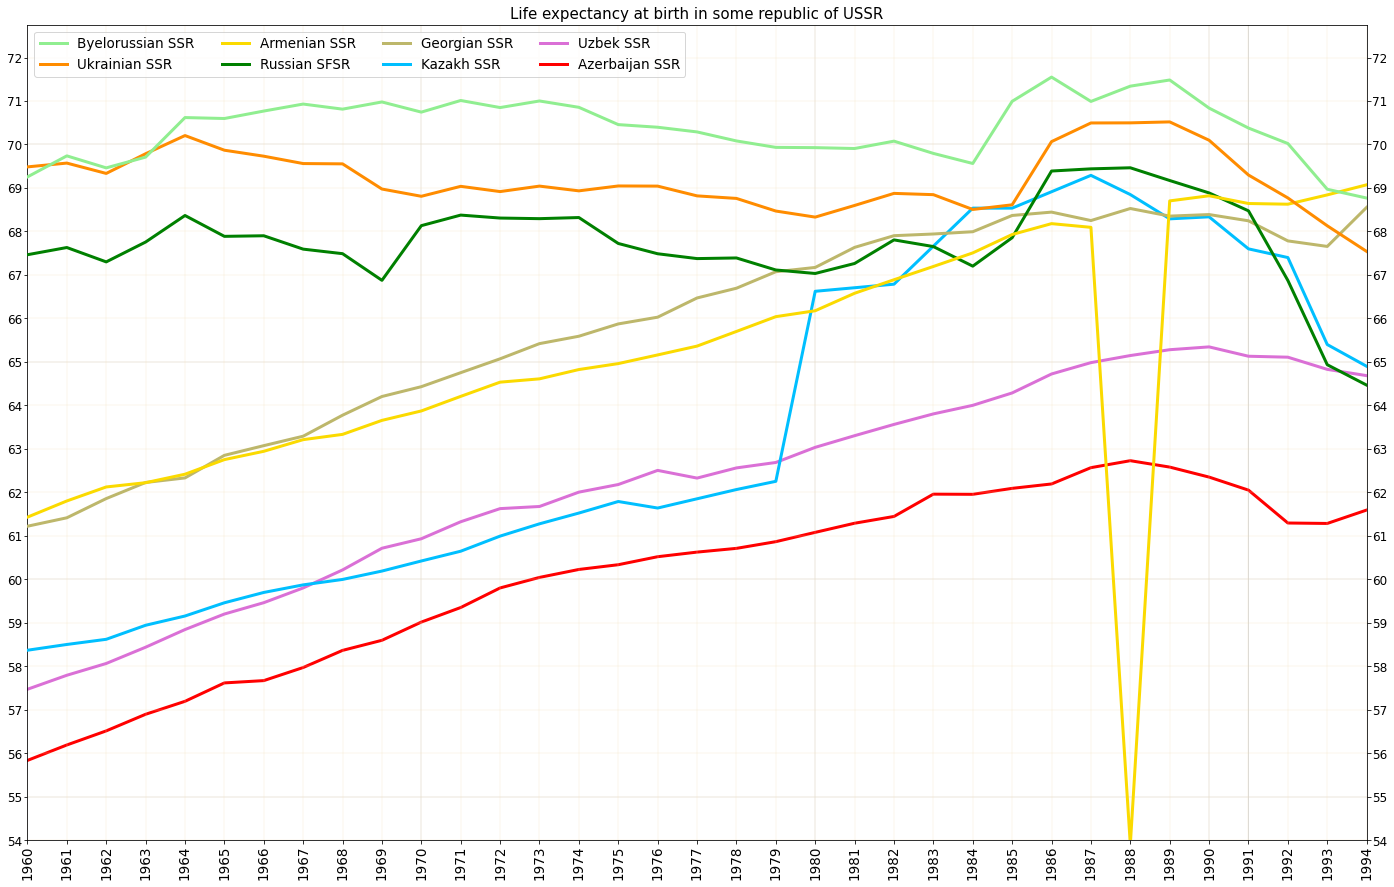

In [13]:
# # version of chart with Armenia
title = TitlePars(label_en='Life expectancy at birth in some republic of USSR',
                  label_ru='Ожидаемая при рождении продолжительность жизни в некоторых республиках СССР',
                  fontsize=15)

ls_countries = {'Belarus': 'lightgreen',
                'Ukraine': 'darkorange',
                'Armenia': '#fbda00',
                'Russia': 'green',
                'Georgia': 'darkkhaki',
                'Kazakhstan': 'deepskyblue',
                'Uzbekistan': 'orchid',                
                'Azerbaijan': 'red',
               }   #'dodgerblue'

chart_lim = ChartLim(bottom=54, up=72.75)

create_chart(df.loc[:1994], ls_countries, figure_size=figure_size, title=title, legend=legend, use_USSR_naming=True, chart_lim=chart_lim, lang=LANG, ver_lines_strong=[1991],
             xticks_size=13.5, yticks_size=12, destination='show', file_name='Life expectancy in USSR (2)')

<br />
<br />

In [14]:
# # Comparison of Ukraine and Russia
# title = TitlePars(label_en='Life expectancy at birth in Ukraine and Russia',
#                   label_ru='Ожидаемая при рождении продолжительность жизни в Украине и России',
#                   fontsize=14)
# ls_countries = {'Ukraine': 'darkorange',
#                 'Russia': 'green'}
# figure_size=(20, 6.5)
# legend = LagendPars(loc='upper left', fontsize=13)
# chart_lim = ChartLim(bottom=64, up=73.5)
# # chart_lim=None

# create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, lang=LANG, ver_lines_strong=[1991, 2000, 2014],
#              xticks_size=13, yticks_size=11.5, destination=DESTINATION_OUTPUT, file_name='Comparison of life expectancy in Ukraine and Russia')

<br />
<br />

In [15]:
# Comparison of some post-USSR countries
title = TitlePars(label_en='Life expectancy at birth in Belarus, Ukraine, Russia, and Kazakhstan',
                  label_ru='Ожидаемая при рождении продолжительность жизни в Белоруссии, Украине, России и Казахстане',
                  fontsize=15)
ls_countries = {'Belarus': 'lightgreen',
                'Ukraine': 'darkorange',
                'Russia': 'green',
                'Kazakhstan': 'deepskyblue'
                }
figure_size=(24, 12)
legend = LagendPars(loc='upper left', fontsize=13.5)
chart_lim = ChartLim(bottom=58, up=74.5)

create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, lang=LANG, ver_lines_strong=[1991],
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in Ukraine Belarus Russia Kazakhstan')

<br />
<br />

In [16]:
# Comparison of countries of CIS (Commonwealth of Independent States)
title = TitlePars(label_en='Life expectancy at birth in countries of CIS',
                  label_ru='Ожидаемая при рождении продолжительность жизни в странах СНГ',
                  fontsize=15)
ls_countries = {'Armenia': '#fbda00',
                'Belarus': 'lightgreen',
                'Kazakhstan': 'deepskyblue',
                'Azerbaijan': 'tomato',
                'Russia': 'green',
                'Kyrgyzstan': '#ffa200',
                'Uzbekistan': 'orchid',
                'Moldova': 'blue',
                'Tajikistan': 'rosybrown'
               }

# #fbda00   lightpink
# 'Turkmenistan': 'aquamarine',

figure_size=(24, 15)
legend = LagendPars(loc='upper left', fontsize=13.5, ncol=3)
chart_lim = ChartLim(bottom=52.75, up=75.75)

create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, lang=LANG, ver_lines_strong=[1991],
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in countries of CIS')

<br />
<br />

In [17]:
# Comparison of some big countries
title = TitlePars(label_en='Life expectancy at birth in some big countries',
                  label_ru='Ожидаемая при рождении продолжительность жизни в некоторых крупных странах',
                  fontsize=15)
ls_countries = {'Japan': 'gold',
                'South Korea': '#dcb853',
                'France': 'darkviolet',
                'Germany': 'chocolate',
                'UK': '#5dafef',  #'dodgerblue',
                'China': 'red',
                'USA': 'blue',
                'Saudi Arabia': 'limegreen',
                'Russia': 'green',
                'India': '#ff9933',
                # 'Spain': 'lime',
                # 'Australia': '#c88e00'
}

figure_size=(24, 15)
legend = LagendPars(loc='upper left', fontsize=13.5, ncol=2)
chart_lim = ChartLim(bottom=44.5, up=85)

create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, lang=LANG,
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in some big countries')

In [18]:
# Comparison of USA, China and Russia
title = TitlePars(label_en='Life expectancy at birth in USA, China and Russia',
                  label_ru='Ожидаемая при рождении продолжительность жизни в США, Китае и России',
                  fontsize=14)
ls_countries = {'USA': 'blue',
                'China': 'red',
                'Russia': 'green'}
figure_size=(20, 12)
legend = LagendPars(loc='upper left', fontsize=13)
chart_lim = ChartLim(bottom=50, up=79.5)

create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, lang=LANG,
             xticks_size=13, yticks_size=11.5, destination=DESTINATION_OUTPUT, file_name='Comparison of life expectancy in USA China Russia')

<br />
<br />

In [19]:
# Only USA and Russia
title = TitlePars(label_en='Life expectancy at birth in USA and Russia',
                  label_ru='Ожидаемая при рождении продолжительность жизни в США и России',
                  fontsize=14)
ls_countries = {'USA': 'blue',
                'Russia': 'green'}
ver_lines_strong=[1991, 2014, 2019]
figure_size=(20, 8)
legend = LagendPars(loc='upper left', fontsize=12)
chart_lim = ChartLim(bottom=64, up=79.5)

create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, lang=LANG, ver_lines_strong=ver_lines_strong,
             xticks_size=13, yticks_size=11.5, destination=DESTINATION_OUTPUT, file_name='Life expectancy in Russia and the US')
                                                                             # file_name='Comparison of life expectancy in USA and Russia')

<br />
<br />

In [20]:
# Largest European countries
title = TitlePars(label_en='Life expectancy at birth in the largest European countries (by population)',
                  label_ru='Ожидаемая при рождении продолжительность жизни в крупнейших европейских странах (по численности населения)',
                  fontsize=15)
ls_countries = {'Spain': '#fabd00',
                'Italy': 'olive',
                'France': 'darkviolet',
                'Germany': 'chocolate',
                'UK': 'blue',
                'Poland': 'red',
                'Russia': 'green',
                'Ukraine': 'darkorange'}
figure_size=(24, 15)
legend = LagendPars(loc='upper left', fontsize=13.5, ncol=2)
chart_lim = ChartLim(bottom=64, up=84)

create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, lang=LANG,
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in the largest European countries')

<br />
<br />

In [21]:
# Yet some more European countries
title = TitlePars(label_en='Life expectancy at birth in some European countries',
                  label_ru='Ожидаемая при рождении продолжительность жизни некоторых европейских странах',
                  fontsize=15)
ls_countries = {'Sweden': '#fecc00',
                'Netherlands': 'lime',
                'Belgium': '#cc982a',
                'Greece': 'dodgerblue',
                'Portugal': 'red',
                'Czechia': '#bf2429',
                'Hungary': '#477050',
                'Romania': 'blue',
                'Belarus': 'lightgreen'}
figure_size=(24, 15)
legend = LagendPars(loc='upper left', fontsize=13.5, ncol=3)
chart_lim = ChartLim(bottom=62.5, up=83.5)

create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, lang=LANG,
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in some European countries')

<br />
<br />

In [22]:
# Yet some more European countries (2)
title = TitlePars(label_en='Life expectancy at birth in some European countries',
                  label_ru='Ожидаемая при рождении продолжительность жизни в некоторых европейских странах',
                  fontsize=15)
ls_countries = {'Switzerland': 'red',
                'Norway': 'blue',
                'Ireland': '#ff883e',
                'Finland': '#002f6c',
                'Austria': 'darkgray',
                'Denmark': 'aqua',
                'Croatia': 'olive',
                'Slovakia': 'lightgreen',
                'Serbia': 'green',
                'Bulgaria': 'mediumturquoise'}
figure_size=(24, 15)
legend = LagendPars(loc='upper left', fontsize=13.5, ncol=2)
chart_lim = ChartLim(bottom=65.5, up=84.25)

create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, lang=LANG,
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in some European countries -2')

<br />
<br />

<br />
<br />

In [23]:
# Largest Asian countries
title = TitlePars(label_en='Life expectancy at birth in some Asian countries',
                  label_ru='Ожидаемая при рождении продолжительность жизни в некоторых азиатских странах',
                  fontsize=15)
ls_countries = {'Japan': 'gold',
                'South Korea': '#dcb853',
                'Israel': '#0038b8',
                'China': 'red',
                'Russia': 'green',
                'India': '#ff9933',
                'Indonesia': 'aqua',
                'Pakistan': 'yellowgreen'}

figure_size=(24, 15)
legend = LagendPars(loc='upper left', fontsize=13.5, ncol=2)
chart_lim = ChartLim(bottom=42, up=85)

create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, lang=LANG,
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in Asian countries')

<br />
<br />

In [24]:
# Countries of South-East Asia and Oceania
title = TitlePars(label_en='Life expectancy at birth in some countries of South-East Asia and Oceania',
                  label_ru='Ожидаемая при рождении продолжительность жизни в некоторых странах Юго-Восточной Азии и Океании',
                  fontsize=15)
ls_countries = {'Singapore': 'limegreen',
                'Australia': '#c88e00',
                'New Zealand': '#012169',
                'Thailand': '#a51931',
                'China': 'red',
                'Malaysia': 'blue',
                'Philippines': '#fcd116',
                'India': '#ff9933',
                'Indonesia': 'aqua',
                # 'Bangladesh': '#006a4e',     #'#6d513d',     #'#2d2a4a',  #   '#006a4e',
               }

figure_size=(24, 15)
legend = LagendPars(loc='upper left', fontsize=13.5, ncol=3)
chart_lim = ChartLim(bottom=42.5, up=85)

create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, lang=LANG,
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in countries of South-East Asia and Oceania')

<br />
<br />

In [25]:
# Largest countries of North America
title = TitlePars(label_en='Life expectancy at birth in some North American countries',
                  label_ru='Ожидаемая при рождении продолжительность жизни в некоторых североамериканских странах',
                  fontsize=15)
ls_countries = {'Canada': 'green',
                'Costa Rica': '#825123', # '#cb8e32',
                'USA': 'blue',
                'Cuba': '#5dafef',
                'Panama': '#da121a',
                'Mexico': 'orange'
               }


# 'Guatemala', 'Honduras', 'Nicaragua', 'El Salvador', 'Costa Rica', 'Panama'
figure_size=(24, 15)
legend = LagendPars(loc='upper left', fontsize=13.5, ncol=2)
chart_lim = ChartLim(bottom=55, up=83)

create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, lang=LANG,
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in countries of North America')

<br />
<br />

In [26]:
# Largest countries of South America
title = TitlePars(label_en='Life expectancy at birth in some South American countries',
                  label_ru='Ожидаемая при рождении продолжительность жизни в некоторых южноамериканских странах',
                  fontsize=15)
ls_countries = {'Chile': '#0039a6',
                'Argentina': '#74acdf',
                'Ecuador': 'lime',   
                'Colombia': '#ffcd00',
                'Peru': '#d91023',
                'Brazil': '#009b3a',
                'Uruguay': 'rosybrown',
                'Venezuela': 'grey'
               }

figure_size=(24, 15)
legend = LagendPars(loc='upper left', fontsize=13.5, ncol=2)
chart_lim = ChartLim(bottom=47, up=80.75)

create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, lang=LANG,
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in countries of South America')

<br />
<br />

In [27]:
# Largest countries of Africa
title = TitlePars(label_en='Life expectancy at birth in some African countries',
                  label_ru='Ожидаемая при рождении продолжительность жизни в некоторых африканских странах',
                  fontsize=15)
ls_countries = {'Algeria': '#006633',
                'Egypt': '#c09300',
                'Tanzania': '#1eb53a',
                'South Africa': 'blue',    
                'Ethiopia': '#fcdd09',
                'Kenya': 'red',    
                'DR Congo': '#00d2ff',                
                'Nigeria': 'black'}

figure_size=(24, 15)
legend = LagendPars(loc='upper left', fontsize=13.5, ncol=2)
chart_lim = ChartLim(bottom=36, up=77)

create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, lang=LANG,
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in African countries')

<br />
<br />

In [28]:
# some countries of Near East
title = TitlePars(label_en='Life expectancy at birth in some countries of the Near East',
                  label_ru='Ожидаемая при рождении продолжительность жизни в некоторых странах Ближнего Востока',
                  fontsize=15)

ls_countries = {'Israel': '#0038b8',
                'United Arab Emirates': 'black',
                'Kuwait': 'magenta',
                'Saudi Arabia': '#006c35',
                'Turkey': 'red',
                'Jordan': 'aqua',
                'Iran': 'limegreen',
                'Syria': 'gold',
                'Iraq': 'blue',
                }          # 'Lebanon': 'chocolate',

figure_size=(24, 15)
legend = LagendPars(loc='upper left', fontsize=13.5, ncol=3)
chart_lim = ChartLim(bottom=44, up=83.25)

create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, lang=LANG,
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in countries of Near East')

<br />
<br />
<br />

---

[Закавказье](https://ru.wikipedia.org/wiki/Закавказье) (Южный Кавказ) / [South Caucasus](https://en.wikipedia.org/wiki/South_Caucasus)

In [29]:
title = TitlePars(label_en='Life expectancy at birth in the South Caucasus',
                  label_ru='Ожидаемая при рождении продолжительность жизни на Южном Кавказе',
                  fontsize=15)

ls_countries = {'Armenia': 'orange',
                'Georgia': 'blue',
                'Azerbaijan': 'red'
               }
    #             'Armenia': '#fbda00',
    #             'Georgia': 'darkkhaki',
    #             'Azerbaijan': 'tomato'

ver_lines_strong=[1991]

figure_size=(20, 10)
legend = LagendPars(loc='upper left', fontsize=13.5, ncol=1)
chart_lim = ChartLim(bottom=53.75, up=76, empty_labels_up=1)

create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, linewidth=4, ver_lines_strong=ver_lines_strong, lang=LANG,
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in South Caucasus')

In [30]:
title = TitlePars(label_en='Life expectancy at birth in the South Caucasus and neighboring countries',
                  label_ru='Ожидаемая при рождении продолжительность жизни на Южном Кавказе и в соседних с ним странах',
                  fontsize=15)

ls_countries = {'Armenia': 'orange',
                'Georgia': 'blue',
                'Azerbaijan': 'red',
                'Turkey': 'lightpink',
                'Iran': 'khaki',
                'Russia': 'palegreen'
                }
ver_lines_strong=[1991]

figure_size=(24, 15)
legend = LagendPars(loc='upper left', fontsize=13.5, ncol=2)
chart_lim = ChartLim(bottom=50, up=78.5, empty_labels_up=0)

create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, linewidth=3, ver_lines_strong=ver_lines_strong, lang=LANG,
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in South Caucasus and its neighbours')

In [31]:
# Comparison of South Korea and North Korea
title = TitlePars(label_en='Life expectancy at birth in South and North Koreas',
                  label_ru='Ожидаемая при рождении продолжительность жизни в Южной и Северной Кореях',
                  fontsize=14)
ls_countries = {'South Korea': '#0047a0',
                'North Korea': '#ed1c27'}
figure_size=(20, 10.5)
legend = LagendPars(loc='upper left', fontsize=13)
chart_lim = ChartLim(bottom=54, up=84)
# chart_lim=None

create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, lang=LANG,
             xticks_size=13, yticks_size=11.5, destination=DESTINATION_OUTPUT, file_name='Comparison of life expectancy in South and North Koreas')

In [32]:
# Comparison of Armenia and Azerbaijan
title = TitlePars(label_en='Life expectancy at birth in Armenia and Azerbaijan',
                  label_ru='Ожидаемая при рождении продолжительность жизни в Армении и Азербайджане',
                  fontsize=14)
ls_countries = {'Armenia': '#f2a800',
                'Azerbaijan': '#00b5e2'}
ver_lines_strong=[1991]
figure_size=(20, 8.5)
legend = LagendPars(loc='upper left', fontsize=13)
chart_lim = ChartLim(bottom=54, up=76, empty_labels_up=1)
# chart_lim=None

create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, ver_lines_strong=ver_lines_strong, lang=LANG,
             xticks_size=13, yticks_size=11.5, destination=DESTINATION_OUTPUT, file_name='Comparison of life expectancy in Armenia and Azerbaijan')

In [33]:
# Comparison of Georgia and Azerbaijan
title = TitlePars(label_en='Life expectancy at birth in Georgia and Azerbaijan',
                  label_ru='Ожидаемая при рождении продолжительность жизни в Грузии и Азербайджане',
                  fontsize=14)
ls_countries = {'Georgia': 'deeppink',
                'Azerbaijan': '#00b5e2'}
ver_lines_strong=[1991]
figure_size=(20, 8.5)
legend = LagendPars(loc='upper left', fontsize=13)
chart_lim = ChartLim(bottom=55.75, up=74.25)
# chart_lim=None

create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, ver_lines_strong=ver_lines_strong, lang=LANG,
             xticks_size=13, yticks_size=11.5, destination=DESTINATION_OUTPUT, file_name='Comparison of life expectancy in Georgia and Azerbaijan')

In [34]:
# Comparison of Turkey and Azerbaijan
title = TitlePars(label_en='Life expectancy at birth in Turkey and Azerbaijan',
                  label_ru='Ожидаемая при рождении продолжительность жизни в Турции и Азербайджане',
                  fontsize=14)
ls_countries = {'Turkey': '#e30a17',
                'Azerbaijan': '#00b5e2'}
ver_lines_strong=[1991]
figure_size=(20, 10)
legend = LagendPars(loc='upper left', fontsize=13)
chart_lim = ChartLim(bottom=50.75, up=78.5)
# chart_lim=None

create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, ver_lines_strong=ver_lines_strong, lang=LANG,
             xticks_size=13, yticks_size=11.5, destination=DESTINATION_OUTPUT, file_name='Comparison of life expectancy in Turkey and Azerbaijan')

In [35]:
# Comparison of Turkey and Armenia
title = TitlePars(label_en='Life expectancy at birth in Turkey and Armenia',
                  label_ru='Ожидаемая при рождении продолжительность жизни в Турции и Армении',
                  fontsize=14)
ls_countries = {'Turkey': '#e30a17',
                'Armenia': '#f2a800'}
ver_lines_strong=[1991]
figure_size=(20, 10.5)
legend = LagendPars(loc='upper left', fontsize=13)
chart_lim = ChartLim(bottom=50.75, up=78.5)
# chart_lim=None

create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, ver_lines_strong=ver_lines_strong, lang=LANG,
             xticks_size=13, yticks_size=11.5, destination=DESTINATION_OUTPUT, file_name='Comparison of life expectancy in Turkey and Armenia')

In [36]:
# # Comparison of Turkey and Georgia
# title = TitlePars(label_en='Life expectancy at birth in Turkey and Georgia',
#                   label_ru='Ожидаемая при рождении продолжительность жизни в Турции и Грузии',
#                   fontsize=14)
# ls_countries = {'Turkey': '#e30a17',
#                 'Georgia': 'darkkhaki'}
# ver_lines_strong=[1991]
# figure_size=(20, 10.5)
# legend = LagendPars(loc='upper left', fontsize=13)
# chart_lim = ChartLim(bottom=50.75, up=78.5)
# # chart_lim=None

# create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, ver_lines_strong=ver_lines_strong, lang=LANG,
#              xticks_size=13, yticks_size=11.5, destination=DESTINATION_OUTPUT, file_name='Comparison of life expectancy in Turkey and Georgia')

In [37]:
# # play beep to denote completion of the program
# import IPython.display as ipd
# import numpy as np

# # manually generated sound
# t = 1  # time is seconds
# beep = np.sin(2*np.pi*400*np.arange(10000*t)/10000)
# ipd.Audio(beep, rate=10000, autoplay=True)

In [38]:
# assert False

<br />
<br />
<br />

---

[High-income country](https://en.wikipedia.org/wiki/High-income_country), [Low-income country](https://en.wikipedia.org/wiki/Low-income_country)

In [39]:
# some countries of Near East
title = TitlePars(label_en='Average life expectancy at birth in groups of countries with different income',
                  label_ru='Ожидаемая при рождении продолжительность жизни в группах стран с различным уровнем дохода',
                  fontsize=15)

ls_countries = {'High income': 'darkviolet',
                # 'Upper middle income': 'wheat',
                'Middle income': 'dodgerblue',
                # 'Lower middle income': 'yellow',
                'Low income': 'lightsteelblue'}

figure_size=(24, 15)
legend = LagendPars(loc='upper left', fontsize=13.5, ncol=1)
chart_lim = ChartLim(bottom=41, up=81.5)

create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, linewidth=5, lang=LANG,
             xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in macroregion -income comparison')

In [40]:
# explore numeric values just for interest
pd.concat([df.loc[:, 'High income'], df.loc[:, 'Low income'], df.loc[:, 'High income'] - df.loc[:, 'Low income']], axis='columns').T.rename(index={0:'Δ'}).round(2)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
High income,68.42,68.82,68.78,69.02,69.50,69.63,69.90,70.18,70.04,70.17,70.47,70.78,71.02,71.20,71.59,71.9,72.17,72.57,72.71,73.05,73.08,73.46,73.78,73.88,74.16,74.27,74.52,74.79,74.90,75.13,75.27,75.46,75.72,75.79,76.07,76.13,76.49,76.81,77.01,77.15,77.46,77.76,77.92,78.04,78.47,78.58,78.90,79.13,79.29,79.58,79.77,80.04,80.16,80.35,80.61,80.49,80.65,80.69,80.78,80.99,80.09,79.93
Low income,41.39,41.71,42.06,42.19,42.79,42.85,42.68,43.39,43.72,43.94,44.24,44.67,44.47,45.23,45.23,45.5,46.15,46.45,46.54,46.95,47.36,47.67,47.90,46.40,46.18,46.57,47.46,48.01,47.52,48.97,48.96,48.88,48.71,49.42,50.05,49.70,49.78,50.19,49.74,50.87,51.79,52.19,52.75,53.82,54.34,55.00,55.86,56.52,57.16,57.94,58.27,59.26,59.91,60.49,60.97,61.41,61.94,62.31,62.72,63.09,62.61,62.09
Δ,27.03,27.11,26.72,26.83,26.71,26.78,27.22,26.79,26.32,26.24,26.23,26.11,26.55,25.97,26.36,26.4,26.01,26.11,26.18,26.10,25.72,25.79,25.88,27.48,27.98,27.70,27.05,26.78,27.39,26.15,26.31,26.57,27.00,26.37,26.01,26.43,26.70,26.62,27.26,26.28,25.67,25.57,25.17,24.22,24.13,23.58,23.04,22.61,22.13,21.64,21.50,20.78,20.25,19.86,19.63,19.08,18.71,18.38,18.05,17.90,17.48,17.84


<br />
<br />
<br />

---

In [41]:
# # Comparison of some post-USSR countries
# title = TitlePars(label_en='Life expectancy at birth in some post-USSR countries',
#                   label_ru='Ожидаемая при рождении продолжительность жизни в некоторых пост-советских странах',
#                   fontsize=15)
# ls_countries = {'Belarus': 'lightgreen',
#                 'Azerbaijan': 'lightpink',
#                 'Kazakhstan': 'deepskyblue',
#                 'Russia': 'green',
#                 'Ukraine': 'darkorange',
#                 'Uzbekistan': 'orchid'
#                }
# figure_size=(24, 15)
# legend = LagendPars(loc='upper left', fontsize=13.5, ncol=2)
# chart_lim = ChartLim(bottom=58, up=75)

# create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, lang=LANG,
#              xticks_size=13.5, yticks_size=12, destination='here', file_name='Life expectancy in post-USSR countries (1)')

In [42]:
# # Comparison of some post-USSR countries
# title = TitlePars(label_en='Life expectancy at birth in some post-USSR countries',
#                   label_ru='Ожидаемая при рождении продолжительность жизни в некоторых пост-советских странах',
#                   fontsize=15)
# ls_countries = {'Belarus': 'lightgreen',
#                 'Azerbaijan': 'lightpink',
#                 'Kazakhstan': 'deepskyblue',
#                 'Russia': 'green',
#                 'Uzbekistan': 'orchid',
#                 'Ukraine': 'darkorange',
#                 'Kyrgyzstan': '#fbbc00',                
#                 'Tajikistan': 'rosybrown',                
#                 'Turkmenistan': 'aquamarine'}

# figure_size=(24, 15)
# legend = LagendPars(loc='upper left', fontsize=13.5, ncol=3)
# chart_lim = ChartLim(bottom=50, up=75)

# create_chart(df, ls_countries, figure_size=figure_size, title=title, legend=legend, chart_lim=chart_lim, lang=LANG,
#              xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in post-USSR countries')

<br />
<br />
<br />

---

In [43]:
# Function that transform data in standard form (yyyy-mm-dd) in float number (yyyy.xx...)
def data_to_ration(data_st):
    year, month, day = (int(v) for v in data_st.split('-'))
    if year % 4 == 0:
        nmb_days_in_month = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
        no_day = sum(nmb_days_in_month[:month-1]) + day
        # print(f"no_day: {no_day}")
        ratio = year + (no_day - 1) / 366
    else:
        nmb_days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
        no_day = sum(nmb_days_in_month[:month-1]) + day
        # print(f"no_day: {no_day}")
        ratio = year + (no_day - 1) / 365
    return ratio

In [44]:
# Function that place a text fragment on chart
def place_text(plt, date_st, height_age, s, fs=18, color='dimgray'):
    plt.text(x=data_to_ration(date_st)-0.3, y=height_age-0.25, s=s, verticalalignment='top', fontsize=fs, color=color)

In [45]:
AnnotationNote = namedtuple('AnnotationNote', ['date', 'height', 'text_en', 'text_ru', 'fs', 'color'],  # fs - font_size
                            defaults=(2000, 80, 'name', 'имя', 15, 'dimgray'))

def create_chart_with_leaders(df, ls_countries, *, figure_size, title, legend, use_USSR_naming=False, chart_lim=None, years_lim=None,
                              linewidth=3, lang=LANG, ver_lines=[], ver_lines_strong=[], annotations=[],
                              xticks_size=13, yticks_size=11.5, destination=DESTINATION_OUTPUT, file_name='chart_with_leaders'):
    
    if destination == 'pass':
        return None
    
    plt.rcParams['figure.figsize'] = figure_size
    
    year_min = df.index[0]
    year_max = df.index[-1]

    ylim_min = df.loc[:, ls_countries.keys()].min().min()
    ylim_max = df.loc[:, ls_countries.keys()].max().max()
    print(f"min: {ylim_min:.2f}, max: {ylim_max:.2f}")
    
    # if limits for y-axes is not given, calculate optimal values
    if not chart_lim:
        if ylim_min % 1 < 0.65:
            ylim_min = math.floor(ylim_min)
        else:
            ylim_min -= 0.15

        if ylim_max % 1 > 0.25:
            ylim_max = math.ceil(ylim_max)
        else:
            ylim_max += 0.15

        chart_lim = ChartLim(bottom=ylim_min, up=ylim_max)
    
    ylim_bottom_label = math.ceil(chart_lim.bottom)
    ylim_up_label = math.floor(chart_lim.up)

    plt.tick_params(axis='y', which='both', labelleft=True, labelright=True, reset=True, pad=1.5)
    plt.tick_params(axis='x', which='both', pad=1.5)

    plt.xlim(year_min, year_max)
    # plt.grid(color='wheat', axis='y', linewidth=1.25)
    # plt.grid(color='wheat', axis='x', linewidth=1.25)
    
    # Make grid. Since lines for years are shifted at this type of charts, not-standard way of grid creation is used
    for year in range(year_min, year_max+1):
        plt.axvline(x=year - 0.5, color='wheat', linewidth=0.25 , zorder=0)
    for year in range(year_min - year_min % 10 + 10, year_max, 10):
        plt.axvline(x=year - 0.5, color='wheat', linewidth=0.5 if year == 2000 else 0.333 , zorder=0)
    for age in range(ylim_bottom_label, ylim_up_label+1):
        plt.axhline(y=age, color='wheat', linewidth=0.25, zorder=0)
    for age in range(ylim_bottom_label - ylim_bottom_label % 5 + 5, ylim_up_label, 5):
        plt.axhline(y=age, color='wheat', linewidth=0.333, zorder=0)
    
    # place vertical lines and annotations for leaders
    for data_st in ver_lines:
        data_ratio = data_to_ration(data_st)
        plt.axvline(x=data_ratio - 0.5, color='lightgrey', linewidth=1.25, zorder=0)
    
    for data_st in ver_lines_strong:
        data_ratio = data_to_ration(data_st)
        plt.axvline(x=data_ratio - 0.5, color='lightgrey', linewidth=2.5, zorder=0)

    for annotation in annotations:
        place_text(plt, annotation.date, annotation.height, annotation.text_ru if lang=='ru' else annotation.text_en, annotation.fs, annotation.color)

    labels_x = range(year_min, year_max+1)
    labels_y = range(ylim_bottom_label, ylim_up_label+1)
    plt.ylim(chart_lim.bottom, chart_lim.up)
    plt.xticks(labels_x, fontsize=xticks_size, rotation='vertical')
    placed_labels = ('',) * chart_lim.empty_labels_down + \
               tuple(labels_y)[chart_lim.empty_labels_down:-chart_lim.empty_labels_up if chart_lim.empty_labels_up else None] + \
               ('',) * chart_lim.empty_labels_up
    plt.yticks(labels_y, labels=placed_labels, fontsize=yticks_size)      
    
    plt.title(label=title.label_ru if lang=='ru' else title.label_en, fontsize=title.fontsize)

    for z, country, color in zip(range(len(ls_countries),0,-1), ls_countries.keys(), ls_countries.values()):
        label = dd_to_rus[country] if lang=='ru' else country
        label = dd_to_USSR_naming[label] if use_USSR_naming else label
        plt.plot(df.index, df[country], linestyle='-', color=color, linewidth=linewidth, label=label, zorder=z)
        
    plt.legend(loc=legend.loc, fontsize=legend.fontsize, ncol=legend.ncol)
    
    if destination == 'file':
        plt.savefig(f"group_output-leaders/{file_name}{' -ru' if lang=='ru' else ''}.png", bbox_inches='tight', facecolor='white', pad_inches=0.05)
        print('Data has written to file')
    else:
        plt.show()

In [46]:
# Comparison of some post-USSR countries (with leaders)
title = TitlePars(label_en='Life expectancy at birth in the largest republics of USSR in comparison with leaders of the country',
                  label_ru='Ожидаемая при рождении продолжительность жизни в крупнейших республиках СССР в сопоставлении с главами государства',
                  fontsize=15)

ls_countries = {'Belarus': 'lightgreen',
                'Georgia': 'darkkhaki',
                'Ukraine': 'darkorange',
                'Russia': 'green',
                'Kazakhstan': 'deepskyblue',
                'Uzbekistan': 'orchid',                
                'Azerbaijan': 'tomato'
               }   #'dodgerblue',

figure_size=(24, 15)
legend = LagendPars(loc='upper left', fontsize=13.5, ncol=4)
chart_lim = ChartLim(bottom=55.75, up=72.75)

ver_lines_strong = ['1991-12-25']
ver_lines = ['1964-10-14', '1982-11-12', '1984-02-13', '1985-03-11', '1991-12-25']
annotations = [
    AnnotationNote(date='1961-03-00' if LANG=='ru' else '1961-01-00', height=71.65 if LANG=='ru' else 71.65, text_en='Khrushchev', text_ru='Хрущёв'),
    AnnotationNote(date='1980-02-00' if LANG=='ru' else '1978-01-00', height=72.63, text_en='Brezhnev', text_ru='Брежнев'),
    AnnotationNote(date='1982-10-00', height=72.9, text_en='Andropov', text_ru='Андропов'),
    AnnotationNote(date='1984-01-00', height=72.45, text_en='Chernenko', text_ru='Черненко'),
    AnnotationNote(date='1987-01-00', height=72.8, text_en='Gorbachev', text_ru='Горбачёв')
]

# print(explore_countries(df, ls_countries))

create_chart_with_leaders(
    df.loc[:1994], ls_countries, figure_size=figure_size, title=title, legend=legend, use_USSR_naming=True,
    chart_lim=chart_lim, lang=LANG, ver_lines=ver_lines, ver_lines_strong=ver_lines_strong, annotations=annotations,
    xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in USSR vs leader')

In [47]:
# # version of chart with Armenia
# title = TitlePars(label_en='Life expectancy at birth in some republics of USSR in comparison with leaders of the country',
#                   label_ru='Ожидаемая при рождении продолжительность жизни в некоторых республиках СССР в сопоставлении с главами государства',
#                   fontsize=15)

# chart_lim = ChartLim(bottom=53.75, up=72.75)

# annotations = [
#     AnnotationNote(date='1961-03-00' if LANG=='ru' else '1961-01-00', height=71.52 if LANG=='ru' else 71.55, text_en='Khrushchev', text_ru='Хрущёв'),
#     AnnotationNote(date='1980-05-00' if LANG=='ru' else '1978-01-00', height=72.55, text_en='Brezhnev', text_ru='Брежнев'),
#     AnnotationNote(date='1982-10-00', height=72.9, text_en='Andropov', text_ru='Андропов'),
#     AnnotationNote(date='1984-01-00', height=72.45, text_en='Chernenko', text_ru='Черненко'),
#     AnnotationNote(date='1987-01-00', height=72.8, text_en='Gorbachev', text_ru='Горбачёв')
# ]

# ls_countries = {'Belarus': 'lightgreen',
#                 'Georgia': 'darkkhaki',
#                 'Ukraine': 'darkorange',
#                 'Armenia': '#fbda00',
#                 'Russia': 'green',
#                 'Kazakhstan': 'deepskyblue',
#                 'Uzbekistan': 'orchid',                
#                 'Azerbaijan': 'tomato'
#                }

# create_chart_with_leaders(
#     df.loc[:1994], ls_countries, figure_size=figure_size, title=title, legend=legend, use_USSR_naming=True,
#     chart_lim=chart_lim, lang=LANG, ver_lines=ver_lines, ver_lines_strong=ver_lines_strong, annotations=annotations,
#     xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in USSR vs leader (2)')

In [48]:
title = TitlePars(label_en='Life expectancy at birth in Byelorussian, Ukrainian and Russian republics of USSR in comparison with leaders of the country',
                  label_ru='Ожидаемая при рождении продолжительность жизни в Белорусской, Украинской и Российской республиках СССР в сопоставлении с главами государства',
                  fontsize=15)

ls_countries = {'Belarus': 'lightgreen',
                'Ukraine': 'darkorange',
                'Russia': 'green',
               }

figure_size=(22, 12)
legend = LagendPars(loc='upper left', fontsize=13.5, ncol=1)
chart_lim = ChartLim(bottom=64.5, up=72.25)

ver_lines_strong = ['1991-12-25']
ver_lines = ['1964-10-14', '1982-11-12', '1984-02-13', '1985-03-11', '1991-12-25']
annotations = [
    AnnotationNote(date='1961-01-00', height=71.5 if LANG=='ru' else 71.5, text_en='Khrushchev', text_ru='Хрущёв'), #75.15
    AnnotationNote(date='1972-10-00' if LANG=='ru' else '1970-01-00', height=72.4, text_en='Brezhnev', text_ru='Брежнев'),
    AnnotationNote(date='1982-10-00', height=72.4, text_en='Andropov', text_ru='Андропов'),
    AnnotationNote(date='1984-01-00', height=72.15, text_en='Chernenko', text_ru='Черненко'),
    AnnotationNote(date='1987-01-00', height=72.4, text_en='Gorbachev', text_ru='Горбачёв')
]

create_chart_with_leaders(
    df.loc[:1994], ls_countries, figure_size=figure_size, title=title, legend=legend, use_USSR_naming=True,
    chart_lim=chart_lim, lang=LANG, ver_lines=ver_lines, ver_lines_strong=ver_lines_strong, annotations=annotations,
    xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in USSR vs leader -East_Slavs')

In [49]:
title = TitlePars(label_en='Life expectancy at birth in Byelorussian, Ukrainian, Russian and Moldavian republics of USSR in comparison with leaders of the country',
                  label_ru='Ожидаемая при рождении продолжительность жизни в некоторых республиках СССР в сопоставлении с главами государства',
                  fontsize=15)

ls_countries = {'Belarus': 'lightgreen',
                'Ukraine': 'darkorange',
                'Russia': 'green',
                'Moldova': 'blue'
               }

figure_size=(22, 12)
legend = LagendPars(loc='upper left', fontsize=13.5, ncol=1)
chart_lim = ChartLim(bottom=61, up=72.5)

ver_lines_strong = ['1991-12-25']
ver_lines = ['1964-10-14', '1982-11-12', '1984-02-13', '1985-03-11', '1991-12-25']
annotations = [
    AnnotationNote(date='1961-01-00', height=70.9 if LANG=='ru' else 70.95, text_en='Khrushchev', text_ru='Хрущёв'),
    AnnotationNote(date='1972-10-00' if LANG=='ru' else '1970-01-00', height=72.6, text_en='Brezhnev', text_ru='Брежнев'),
    AnnotationNote(date='1982-10-00', height=72.63, text_en='Andropov', text_ru='Андропов'),
    AnnotationNote(date='1984-01-00', height=72.25, text_en='Chernenko', text_ru='Черненко'),
    AnnotationNote(date='1987-01-00', height=72.6, text_en='Gorbachev', text_ru='Горбачёв')
]

create_chart_with_leaders(
    df.loc[:1994], ls_countries, figure_size=figure_size, title=title, legend=legend, use_USSR_naming=True,
    chart_lim=chart_lim, lang=LANG, ver_lines=ver_lines, ver_lines_strong=ver_lines_strong, annotations=annotations,
    xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in USSR vs leader -ByUaRuMd')

In [50]:
title = TitlePars(label_en='Life expectancy at birth in the South Caucasian republics of USSR in comparison with leaders of the country',
                  label_ru='Ожидаемая при рождении продолжительность жизни в южнокавказских республиках СССР в сопоставлении с главами государства',
                  fontsize=15)

ls_countries = {'Georgia': 'darkkhaki',
                'Armenia': '#fbda00',               
                'Azerbaijan': 'tomato'
               }

figure_size=(22, 12)
legend = LagendPars(loc='upper left', fontsize=13.5, ncol=1)
chart_lim = ChartLim(bottom=54, up=70, empty_labels_up=1)

ver_lines_strong = ['1991-12-25']
ver_lines = ['1964-10-14', '1982-11-12', '1984-02-13', '1985-03-11', '1991-12-25']
annotations = [
    AnnotationNote(date='1961-01-00', height=68.22 if LANG=='ru' else 68.22, text_en='Khrushchev', text_ru='Хрущёв'), #75.15
    AnnotationNote(date='1972-10-00' if LANG=='ru' else '1970-01-00', height=70.1, text_en='Brezhnev', text_ru='Брежнев'),
    AnnotationNote(date='1982-10-00', height=70.1, text_en='Andropov', text_ru='Андропов'),
    AnnotationNote(date='1984-01-00', height=69.6, text_en='Chernenko', text_ru='Черненко'),
    AnnotationNote(date='1987-01-00', height=70.1, text_en='Gorbachev', text_ru='Горбачёв')
]

create_chart_with_leaders(
    df.loc[:1994], ls_countries, figure_size=figure_size, title=title, legend=legend, use_USSR_naming=True,
    chart_lim=chart_lim, lang=LANG, ver_lines=ver_lines, ver_lines_strong=ver_lines_strong, annotations=annotations,
    xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in USSR vs leader -South_Caucasus')

In [51]:
title = TitlePars(label_en='Life expectancy at birth in the Center Asian republics of USSR in comparison with leaders of the country',
                  label_ru='Ожидаемая при рождении продолжительность жизни в центральноазиатских республиках СССР в сопоставлении с главами государства',
                  fontsize=15)

ls_countries = {'Kazakhstan': 'deepskyblue',
                'Uzbekistan': 'orchid',
                'Kyrgyzstan': '#ffa200',
                'Turkmenistan': 'dodgerblue',         
                'Tajikistan': 'rosybrown'
               }

figure_size=(22, 12)
legend = LagendPars(loc='upper left', fontsize=13.5, ncol=1)
chart_lim = ChartLim(bottom=52.75, up=70.5, empty_labels_up=0)

ver_lines_strong = ['1991-12-25']
ver_lines = ['1964-10-14', '1982-11-12', '1984-02-13', '1985-03-11', '1991-12-25']
annotations = [
    AnnotationNote(date='1961-01-00', height=67.3 if LANG=='ru' else 67.3, text_en='Khrushchev', text_ru='Хрущёв'), #75.15
    AnnotationNote(date='1972-10-00' if LANG=='ru' else '1970-01-00', height=70.55, text_en='Brezhnev', text_ru='Брежнев'),
    AnnotationNote(date='1982-10-00', height=70.6, text_en='Andropov', text_ru='Андропов'),
    AnnotationNote(date='1984-01-00', height=70.0, text_en='Chernenko', text_ru='Черненко'),
    AnnotationNote(date='1987-01-00', height=70.55, text_en='Gorbachev', text_ru='Горбачёв')
]

create_chart_with_leaders(
    df.loc[:1994], ls_countries, figure_size=figure_size, title=title, legend=legend, use_USSR_naming=True,
    chart_lim=chart_lim, lang=LANG, ver_lines=ver_lines, ver_lines_strong=ver_lines_strong, annotations=annotations,
    xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in USSR vs leader -Center_Asia')

In [52]:
title = TitlePars(label_en='Life expectancy at birth in the Baltic republics of USSR in comparison with leaders of the country',
                  label_ru='Ожидаемая при рождении продолжительность жизни в прибалтийских республиках СССР в сопоставлении с главами государства',
                  fontsize=15)

ls_countries = {'Estonia': '#0072ce',
                'Latvia': '#9e3039',
                'Lithuania': '#006a44'
               }

figure_size=(22, 12)
legend = LagendPars(loc='upper left', fontsize=13.5, ncol=1)
chart_lim = ChartLim(bottom=65.666, up=72.75, empty_labels_up=0)

ver_lines_strong = ['1991-12-25']
ver_lines = ['1964-10-14', '1982-11-12', '1984-02-13', '1985-03-11', '1991-12-25']
annotations = [
    AnnotationNote(date='1961-01-00', height=72.1 if LANG=='ru' else 72.1, text_en='Khrushchev', text_ru='Хрущёв'),
    AnnotationNote(date='1972-10-00' if LANG=='ru' else '1970-01-00', height=72.9, text_en='Brezhnev', text_ru='Брежнев'),
    AnnotationNote(date='1982-10-00', height=72.95, text_en='Andropov', text_ru='Андропов'),
    AnnotationNote(date='1984-01-00', height=72.7, text_en='Chernenko', text_ru='Черненко'),
    AnnotationNote(date='1987-01-00', height=72.9, text_en='Gorbachev', text_ru='Горбачёв')
]

create_chart_with_leaders(
    df.loc[:1994], ls_countries, figure_size=figure_size, title=title, legend=legend, use_USSR_naming=True,
    chart_lim=chart_lim, lang=LANG, ver_lines=ver_lines, ver_lines_strong=ver_lines_strong, annotations=annotations,
    xticks_size=13.5, yticks_size=12, destination=DESTINATION_OUTPUT, file_name='Life expectancy in USSR vs leader -Baltic')